In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import matplotlib.patches as mpatches
import pickle
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import collections
import warnings
warnings.filterwarnings("ignore")

C:\Users\ezhil\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv('data.csv')

print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
df.columns = df.columns.str.strip()
df = df.drop(columns=['id'])
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


In [4]:
print(df.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  


In [5]:
print(df['gender'].value_counts())
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())
print(df['stroke'].value_counts())
print(df['hypertension'].value_counts())
print(df['heart_disease'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Convert numerical columns to float
df[numerical_columns] = df[numerical_columns].astype(float)

# Display the result
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0           0.0            1.0          Yes        Private   
1     Female  61.0           0.0            0.0          Yes  Self-employed   
2       Male  80.0           0.0            1.0          Yes        Private   
3     Female  49.0           0.0            0.0          Yes        Private   
4     Female  79.0           1.0            0.0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0           1.0            0.0          Yes        Private   
5106  Female  81.0           0.0            0.0          Yes  Self-employed   
5107  Female  35.0           0.0            0.0          Yes  Self-employed   
5108    Male  51.0           0.0            0.0          Yes        Private   
5109  Female  44.0           0.0            0.0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

In [8]:
df.dtypes

gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke               float64
dtype: object

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import pandas as pd

# Create a DataFrame with only the 'bmi' column
df_bmi = df[['bmi']]

pipeline = Pipeline([
    ('imputer', KNNImputer())
])

# Define hyperparameters and their possible values
param_grid = {
    'imputer__n_neighbors': [2, 3, 5, 7, 9, 11, 13],
    'imputer__weights': ['uniform', 'distance'],
}

# Define a custom scoring function for GridSearchCV
def custom_scorer(estimator, X, y):
    try:
        y_pred = estimator.named_steps['imputer'].predict(X)
    except AttributeError:
        y_pred = estimator.named_steps['imputer'].transform(X)
    mse = ((y_pred - y) ** 2).mean()
    return -mse

# Use GridSearchCV with the custom scoring function
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=make_scorer(custom_scorer))
grid_search.fit(df_bmi.dropna(), df_bmi.dropna())

# Get the best parameters
best_params = grid_search.best_params_

# Impute missing values in the 'bmi' column using the best model
best_imputer = grid_search.best_estimator_
df_bmi_imputed = pd.DataFrame(best_imputer.named_steps['imputer'].transform(df_bmi), columns=['bmi'])

# Update the 'bmi' column in the original DataFrame with imputed values
df['bmi'] = df_bmi_imputed['bmi']

# Display the result
print("Best Hyperparameters:", best_params)
print(df.head())

Best Hyperparameters: {'imputer__n_neighbors': 2, 'imputer__weights': 'uniform'}
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0           0.0            1.0          Yes        Private   
1  Female  61.0           0.0            0.0          Yes  Self-employed   
2    Male  80.0           0.0            1.0          Yes        Private   
3  Female  49.0           0.0            0.0          Yes        Private   
4  Female  79.0           1.0            0.0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked     1.0  
1          Rural             202.21  28.893237     never smoked     1.0  
2          Rural             105.92  32.500000     never smoked     1.0  
3          Urban             171.23  34.400000           smokes     1.0  
4          Rural             174.12  24.000000     never smoked     1.0  


In [11]:
df['bmi'].isnull().sum()

0

In [12]:
print(df.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5110.000000  5110.000000  
mean     28.893237     0.048728  
std       7.698018     0.215320  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.400000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000  


<Figure size 800x500 with 0 Axes>

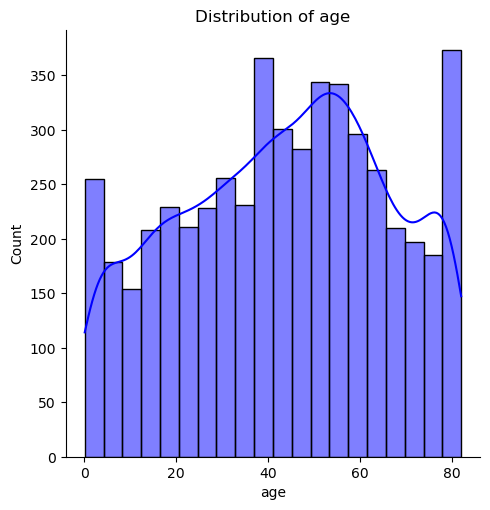

<Figure size 800x500 with 0 Axes>

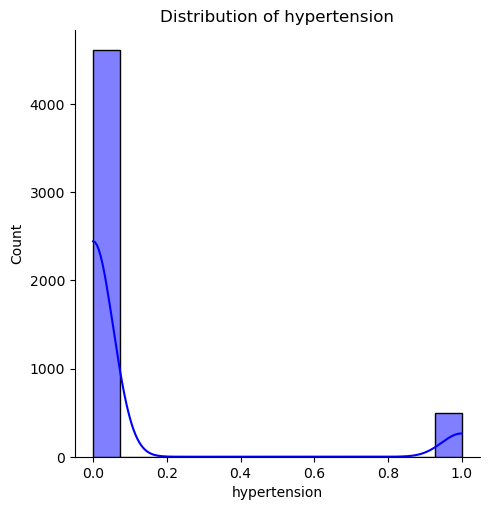

<Figure size 800x500 with 0 Axes>

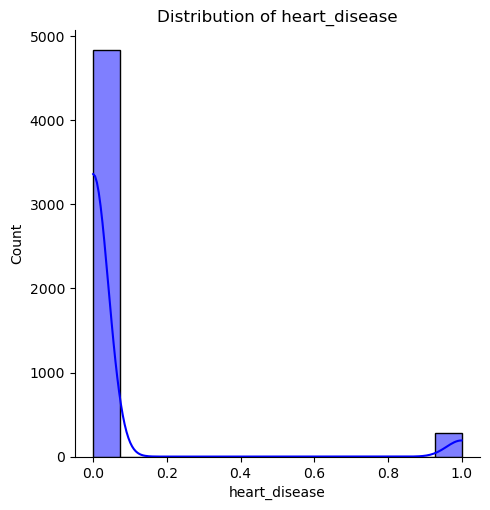

<Figure size 800x500 with 0 Axes>

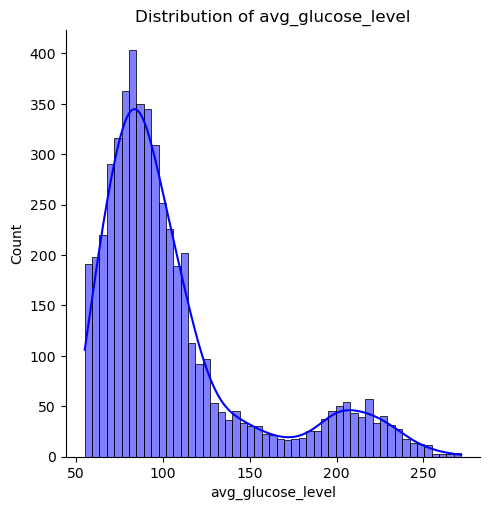

<Figure size 800x500 with 0 Axes>

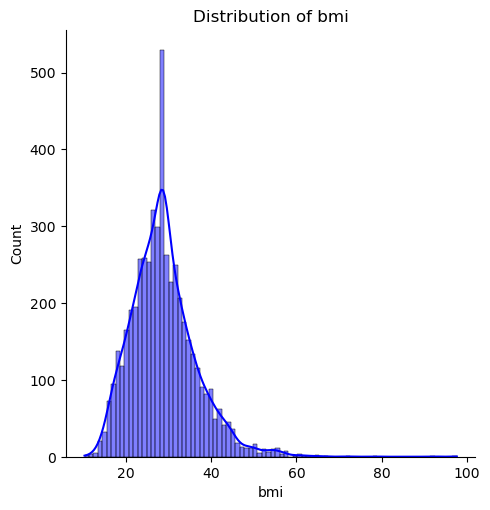

<Figure size 800x500 with 0 Axes>

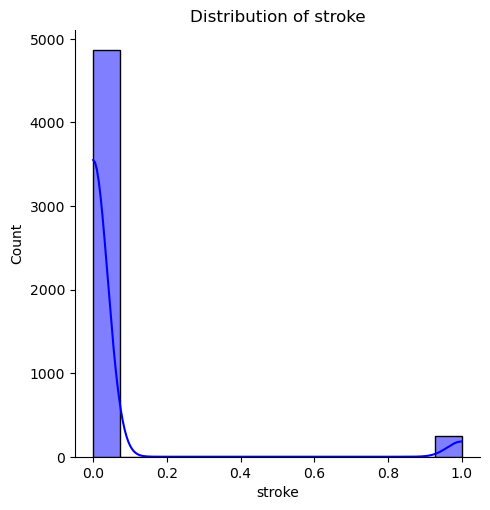

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plot the distribution of each numeric column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.displot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

In [14]:
import pandas as pd
from scipy.stats import skew

# Select the columns of interest
Col_Int2 = ['age', 'avg_glucose_level', 'bmi']

# Calculate skewness for each selected column
skewness_values = df[Col_Int2].apply(lambda x: skew(x, nan_policy='omit'))

# Print the skewness values
print("Skewness values:")
print(skewness_values)

Skewness values:
age                 -0.137019
avg_glucose_level    1.571822
bmi                  1.076400
dtype: float64


In [17]:
import pandas as pd
from scipy.stats import skew

# Select the columns of interest
Col_Int = ['hypertension', 'heart_disease']

# Calculate skewness for each selected column
skewness_values = df[Col_Int].apply(lambda x: skew(x, nan_policy='omit'))

# Print the skewness values
print("Skewness values:")
print(skewness_values)

Skewness values:
hypertension     2.714595
heart_disease    3.946085
dtype: float64


In [18]:
import numpy as np
from scipy.stats import skew

# Select the columns of interest
log_transform_columns = ['avg_glucose_level', 'bmi']

# Apply log transformation
df[log_transform_columns] = np.log1p(df[log_transform_columns])

# Check skewness after log transformation
skewness_values_log = df[log_transform_columns].apply(lambda x: skew(x, nan_policy='omit'))

# Print the skewness values after log transformation
print("Skewness values after log transformation:")
print(skewness_values_log)

Skewness values after log transformation:
avg_glucose_level    0.889209
bmi                  0.017160
dtype: float64


In [19]:
# Replace the original columns with the log-transformed columns
df[log_transform_columns] = np.log1p(df[log_transform_columns])

# Print the DataFrame after log transformation
print("DataFrame after log transformation:")
print(df)

DataFrame after log transformation:
      gender       age  hypertension  heart_disease ever_married  \
0       Male  0.827828           0.0            1.0          Yes   
1     Female  0.752252           0.0            0.0          Yes   
2       Male  0.970470           0.0            1.0          Yes   
3     Female  0.559560           0.0            0.0          Yes   
4     Female  0.955455           1.0            0.0          Yes   
...      ...       ...           ...            ...          ...   
5105  Female  0.970470           1.0            0.0          Yes   
5106  Female  0.983483           0.0            0.0          Yes   
5107  Female  0.366366           0.0            0.0          Yes   
5108    Male  0.592092           0.0            0.0          Yes   
5109  Female  0.488488           0.0            0.0          Yes   

          work_type Residence_type  avg_glucose_level       bmi  \
0           Private          Urban           1.862021  1.531910   
1     Self-em

pip install category_encoders

In [20]:
import pandas as pd
from category_encoders import TargetEncoder  # Assuming you have category_encoders installed

# Assuming df is your DataFrame and categorical_columns contains the categorical column names
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']  # Example columns

# Initializing the TargetEncoder
target_encoder = TargetEncoder()

# Copying the DataFrame to avoid changes in the original data
df_encoded = df.copy()

# Encoding categorical columns
for column in categorical_columns:
    df_encoded[column] = target_encoder.fit_transform(df[column], df['stroke'])

# Display the encoded DataFrame
print(df_encoded)

        gender       age  hypertension  heart_disease  ever_married  \
0     0.051064  0.827828           0.0            1.0      0.065613   
1     0.047094  0.752252           0.0            0.0      0.065613   
2     0.051064  0.970470           0.0            1.0      0.065613   
3     0.047094  0.559560           0.0            0.0      0.065613   
4     0.047094  0.955455           1.0            0.0      0.065613   
...        ...       ...           ...            ...           ...   
5105  0.047094  0.970470           1.0            0.0      0.065613   
5106  0.047094  0.983483           0.0            0.0      0.065613   
5107  0.047094  0.366366           0.0            0.0      0.065613   
5108  0.051064  0.592092           0.0            0.0      0.065613   
5109  0.047094  0.488488           0.0            0.0      0.065613   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0      0.050940        0.052003           1.862021  1.531910       

In [22]:
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your DataFrame and 'stroke' is your target variable
X = df_encoded.drop('stroke', axis=1)  # Features (excluding the target variable)
y = df_encoded['stroke']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting sets (optional)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4088, 10)
X_test shape: (1022, 10)
y_train shape: (4088,)
y_test shape: (1022,)


Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5


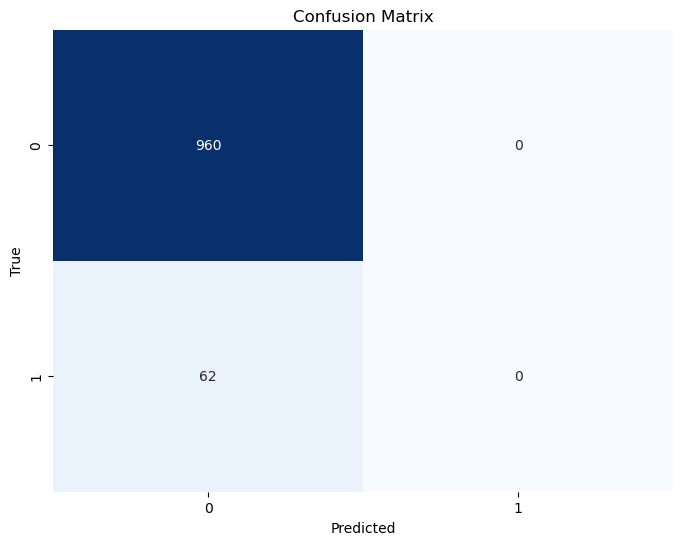

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already split the data into X_train, X_test, y_train, y_test

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Feature Engineering

In [24]:
# Grouping by 'hypertension' and 'heart_disease' columns and calculating mean of 'stroke' column
grouped = df_encoded.groupby(['hypertension', 'heart_disease'])['stroke'].mean().reset_index()

# Renaming the 'stroke' column to a more descriptive name
grouped = grouped.rename(columns={'stroke': 'mean_stroke_by_hypertension_heart_disease'})

# Merging the mean values back to the original DataFrame based on 'hypertension' and 'heart_disease' columns
df_new = pd.merge(df_encoded, grouped, on=['hypertension', 'heart_disease'], how='left')

# Display the updated DataFrame
print(df_new)

        gender       age  hypertension  heart_disease  ever_married  \
0     0.051064  0.827828           0.0            1.0      0.065613   
1     0.047094  0.752252           0.0            0.0      0.065613   
2     0.051064  0.970470           0.0            1.0      0.065613   
3     0.047094  0.559560           0.0            0.0      0.065613   
4     0.047094  0.955455           1.0            0.0      0.065613   
...        ...       ...           ...            ...           ...   
5105  0.047094  0.970470           1.0            0.0      0.065613   
5106  0.047094  0.983483           0.0            0.0      0.065613   
5107  0.047094  0.366366           0.0            0.0      0.065613   
5108  0.051064  0.592092           0.0            0.0      0.065613   
5109  0.047094  0.488488           0.0            0.0      0.065613   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0      0.050940        0.052003           1.862021  1.531910       

In [25]:
# Drop multiple columns
columns_to_drop = ['hypertension', 'heart_disease']
df_new.drop(columns_to_drop, axis=1, inplace=True)
print(df_new.head())

     gender       age  ever_married  work_type  Residence_type  \
0  0.051064  0.827828      0.065613   0.050940        0.052003   
1  0.047094  0.752252      0.065613   0.079365        0.045346   
2  0.051064  0.970470      0.065613   0.050940        0.045346   
3  0.047094  0.559560      0.065613   0.050940        0.052003   
4  0.047094  0.955455      0.065613   0.079365        0.045346   

   avg_glucose_level       bmi  smoking_status  stroke  \
0           1.862021  1.531910        0.079096     1.0   
1           1.842807  1.481066        0.047569     1.0   
2           1.735556  1.506640        0.047569     1.0   
3           1.816262  1.518793        0.053232     1.0   
4           1.818965  1.439569        0.047569     1.0   

   mean_stroke_by_hypertension_heart_disease  
0                                   0.160377  
1                                   0.033864  
2                                   0.160377  
3                                   0.033864  
4                  

### Since this is a stroke prediction, I'm gonna give more importance to recall.

In [26]:
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your DataFrame and 'stroke' is your target variable
X = df_new.drop('stroke', axis=1)  # Features (excluding the target variable)
y = df_new['stroke']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting sets (optional)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4088, 9)
X_test shape: (1022, 9)
y_train shape: (4088,)
y_test shape: (1022,)


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Create SVM Classifier
svm_classifier = SVC(random_state=42, probability=True)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10],
    'class_weight': ['balanced', {0: 1, 1: 20}, {0: 1, 1: 30}]  # Modify class weights as needed
}

# Perform GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Predict probabilities on the test set
y_pred_proba = best_svm_classifier.predict_proba(X_test)

best_recall = 0
best_threshold = 0.5  # Initial threshold

for threshold in np.arange(0.1, 1.0, 0.1):  # Explore thresholds from 0.1 to 0.9
    y_pred_recall = (y_pred_proba[:, 1] > threshold).astype(int)
    current_recall = recall_score(y_test, y_pred_recall)

    # Keep track of the best recall and the corresponding threshold
    if current_recall > best_recall:
        best_recall = current_recall
        best_threshold = threshold

# Apply the best threshold
y_pred_best_threshold = (y_pred_proba[:, 1] > best_threshold).astype(int)

# Calculate metrics with the best threshold
accuracy = accuracy_score(y_test, y_pred_best_threshold)
precision = precision_score(y_test, y_pred_best_threshold)
recall = recall_score(y_test, y_pred_best_threshold)
f1 = f1_score(y_test, y_pred_best_threshold)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred_best_threshold)

# Print the metrics
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"RoC-AuC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 0.1, 'class_weight': {0: 1, 1: 30}, 'gamma': 0.1}
Accuracy: 0.8424657534246576
Precision: 0.21052631578947367
Recall: 0.5806451612903226
F1 Score: 0.30901287553648066
RoC-AuC: 0.8482358870967741
Confusion Matrix:
[[825 135]
 [ 26  36]]


In [28]:
print(y_test.index)

Int64Index([4688, 4478, 3849, 4355, 3826, 3951, 3396,  465,  410, 1632,
            ...
             438, 3786, 1212, 3669, 3454, 3605, 4934, 4835, 4105, 2902],
           dtype='int64', length=1022)


In [29]:
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix, fbeta_score
)
from imblearn.ensemble import EasyEnsembleClassifier
import xgboost as xgb

# Define the rare event class 
rare_event_class = 1  

def f_beta_loss(y_test, y_pred_proba):
    beta = 2  # Adjust the beta value for emphasis on precision or recall
    if len(y_pred_proba.shape) == 1:
        y_pred = (y_pred_proba > 0.5).astype(int)
    else:
        y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)
    f_beta = fbeta_score(y_test, y_pred, beta=beta)
    return 1 - f_beta  # Subtract from 1 to convert to a loss

def weighted_loss(y_test, y_pred_proba):
    weight_false_negatives = 15  # Adjust weight based on importance
    weight_false_positives = 1  # Adjust weight based on importance
    if len(y_pred_proba.shape) == 1:
        y_pred = (y_pred_proba > 0.5).astype(int)
    else:
        y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)
    tn, fp, fn, _ = confusion_matrix(y_test, y_pred).ravel()
    loss = (weight_false_negatives * fn) + (weight_false_positives * fp)
    return loss

def custom_loss(y_test, y_pred_proba):
    penalty_rare_event = 200  # Adjust penalty based on the importance of the rare event
    if len(y_pred_proba.shape) == 1:
        y_pred = (y_pred_proba > 0.5).astype(int)
    else:
        y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)
    rare_event_indices = np.where(y_test == rare_event_class)[0]
    loss = np.sum(np.abs(y_test - y_pred))
    loss += penalty_rare_event * np.sum(np.abs(y_test[rare_event_indices] - y_pred[rare_event_indices]))
    return loss


def master_loss(y_true, y_pred_proba):
    loss_f_beta = f_beta_loss(y_true, y_pred_proba)
    loss_weighted = weighted_loss(y_true, y_pred_proba)
    loss_custom = custom_loss(y_true, y_pred_proba)

    # Adjust weights to balance contributions of different loss functions
    weighted_master_loss = 0.8 * loss_f_beta + 0.5 * loss_weighted + 0.3 * loss_custom

    return weighted_master_loss

# Define XGBoost model with custom loss functions
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)

# Make a custom evaluation metric using the master loss
xgb_model.eval_metric = make_scorer(master_loss, greater_is_better=False, needs_proba=True)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 5],
}

# Perform GridSearchCV with custom loss function as the scoring metric
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_log_loss', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best XGBoost model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_



# Predict probabilities on the test set
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)

best_recall = 0
best_threshold = 0.5  # Initial threshold

for threshold in np.arange(0.1, 1.0, 0.1):  # Explore thresholds from 0.1 to 0.9
    y_pred_recall = (y_pred_proba[:, 1] > threshold).astype(int)
    current_recall = recall_score(y_test, y_pred_recall)

    # Keep track of the best recall and the corresponding threshold
    if current_recall > best_recall:
        best_recall = current_recall
        best_threshold = threshold

# Apply the best threshold
y_pred_best_threshold_xgb = (y_pred_proba_xgb[:, 1] > best_threshold).astype(int)

# Calculate metrics with the best threshold for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_best_threshold_xgb)
precision_xgb = precision_score(y_test, y_pred_best_threshold_xgb)
recall_xgb = recall_score(y_test, y_pred_best_threshold_xgb)
f1_xgb = f1_score(y_test, y_pred_best_threshold_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb[:, 1])
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_threshold_xgb)

# Print the metrics for XGBoost
print("\nXGBoost Model Metrics:")
print(f"Best Parameters: {best_params_xgb}")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"RoC-AuC: {roc_auc_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits

XGBoost Model Metrics:
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.8542074363992173
Precision: 0.23636363636363636
Recall: 0.6290322580645161
F1 Score: 0.3436123348017621
RoC-AuC: 0.8551747311827956
Confusion Matrix:
[[834 126]
 [ 23  39]]


In [30]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Create EasyEnsembleClassifier
easy_ensemble = EasyEnsembleClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'sampling_strategy': ['auto', 'majority', 'not minority'],
    'replacement': [True, False],
    'n_jobs': [-1]
}

# Perform GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(estimator=easy_ensemble, param_grid=param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_easy_ensemble = grid_search.best_estimator_

# Predict probabilities on the test set
y_pred_proba = best_easy_ensemble.predict_proba(X_test)

best_recall = 0
best_threshold = 0.5  # Initial threshold

for threshold in np.arange(0.1, 1.0, 0.1):  # Explore thresholds from 0.1 to 0.9
    y_pred_recall = (y_pred_proba[:, 1] > threshold).astype(int)
    current_recall = recall_score(y_test, y_pred_recall)

    # Keep track of the best recall and the corresponding threshold
    if current_recall > best_recall:
        best_recall = current_recall
        best_threshold = threshold

# Apply the best threshold
y_pred_best_threshold = (y_pred_proba[:, 1] > best_threshold).astype(int)

# Calculate metrics with the best threshold
accuracy = accuracy_score(y_test, y_pred_best_threshold)
precision = precision_score(y_test, y_pred_best_threshold)
recall = recall_score(y_test, y_pred_best_threshold)
f1 = f1_score(y_test, y_pred_best_threshold)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred_best_threshold)

# Print the metrics
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"RoC-AuC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 100, 'n_jobs': -1, 'replacement': False, 'sampling_strategy': 'auto'}
Accuracy: 0.060665362035225046
Precision: 0.060665362035225046
Recall: 1.0
F1 Score: 0.1143911439114391
RoC-AuC: 0.8284106182795699
Confusion Matrix:
[[  0 960]
 [  0  62]]


In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split


# Create Gaussian Naive Bayes Classifier
naive_bayes = GaussianNB()

# Fit the classifier to the training data
naive_bayes.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = naive_bayes.predict_proba(X_test)

best_recall = 0
best_threshold = 0.5  # Initial threshold

for threshold in np.arange(0.1, 1.0, 0.1):  # Explore thresholds from 0.1 to 0.9
    y_pred_recall = (y_pred_proba[:, 1] > threshold).astype(int)
    current_recall = recall_score(y_test, y_pred_recall)

    # Keep track of the best recall and the corresponding threshold
    if current_recall > best_recall:
        best_recall = current_recall
        best_threshold = threshold

# Apply the best threshold
y_pred_best_threshold = (y_pred_proba[:, 1] > best_threshold).astype(int)

# Calculate metrics with the best threshold
accuracy = accuracy_score(y_test, y_pred_best_threshold)
precision = precision_score(y_test, y_pred_best_threshold)
recall = recall_score(y_test, y_pred_best_threshold)
f1 = f1_score(y_test, y_pred_best_threshold)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred_best_threshold)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"RoC-AuC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7318982387475538
Precision: 0.16025641025641027
Recall: 0.8064516129032258
F1 Score: 0.26737967914438504
RoC-AuC: 0.837584005376344
Confusion Matrix:
[[698 262]
 [ 12  50]]
